In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%pwd
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
CreditClient = pd.read_excel("default_ credit_clients.xls", header=1)
C=CreditClient

In [3]:
#Credit=CreditClient.replace({"SEX":{1:"Male",2:"Female"},"default payment next month":{1:"Yes",0:"No"},"EDUCATION":{1:"Graduate",2:"University",3:"Others"}
                            # ,"MARRIAGE":{1:"Married",2:"Single",3:"Others"}})
C=CreditClient.rename(columns={"default payment next month":"Y"})

## Applying Logistics Regression Techniques Here

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import scipy as sp
pd.set_option('display.width',500)
pd.set_option('display.max_columns',200)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [5]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

In [6]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

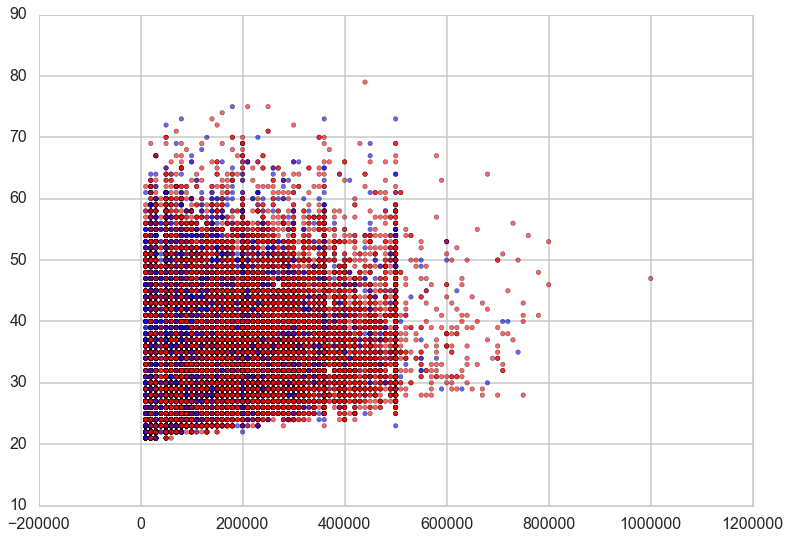

In [16]:
plt.scatter(C.LIMIT_BAL,C.AGE, c=[cm_bright.colors[i] for i in C.Y==1], alpha=0.6)

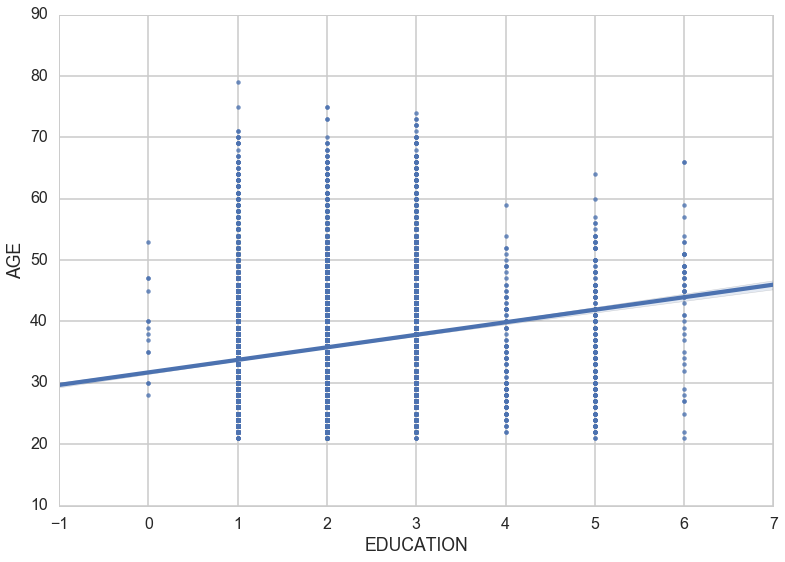

In [17]:
sns.regplot(C.EDUCATION, C.AGE)

In [18]:
% timeit C.isnull().values.any()

1000 loops, best of 3: 844 µs per loop


In [7]:
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average
    

C:\Anaconda3.4\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
C_X =C.drop(['Y','ID'],axis=1)

In [9]:
C_X.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [101]:
C_XX =C_X.drop(['BILL_AMT5','BILL_AMT6','PAY_AMT4','PAY_AMT3','PAY_AMT2','PAY_AMT5','PAY_AMT6','LIMIT_BAL'
               ], axis=1)

In [102]:
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(C_XX.values,C['Y'].values,random_state=5)

In [103]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(Xtrain,Ytrain)
print (accuracy_score(clf.predict(Xtest),Ytest))

0.795333333333


In [104]:
clf =LogisticRegression()
score=cv_score(clf,Xtrain,Ytrain)
print (score)

0.781155555556


Well, model accuracy is not that good;however we will try to use best parameter to make model more generalized for unseen data. We will use regularised parameter c.

In [105]:
#the grid of parameters to search over
#your turn
Cs = [0.001, 0.1, 1, 10, 100]
from sklearn.linear_model import LogisticRegression
max_score = 0

for c in Cs:
        clf = LogisticRegression(C=c)
        score = cv_score(clf, Xtrain, Ytrain)

        if score > max_score:
            max_score = score
            best_C =c
print (max_score, best_C)
    

0.781155555556 1


In [106]:
clf1=LogisticRegression(C=best_C)
clf1.fit(Xtrain,Ytrain)
Ypred=clf1.predict(Xtest)
accuracy_score(Ypred,Ytest)

0.79533333333333334

Now will try to use GridSearchV Tool


In [107]:
from sklearn.grid_search import GridSearchCV
clf2 = LogisticRegression()
parameters ={"C":[.001,0.1,1,10,100]}
fitmodel= GridSearchCV(clf2,param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xtrain,Ytrain)
fitmodel.best_estimator_,fitmodel.best_params_,fitmodel.best_score_,fitmodel.cv,fitmodel.grid_scores_

(LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 1},
 0.7860444444444444,
 5,
 [mean: 0.78129, std: 0.00539, params: {'C': 0.001},
  mean: 0.77840, std: 0.00044, params: {'C': 0.1},
  mean: 0.78604, std: 0.00929, params: {'C': 1},
  mean: 0.78196, std: 0.00678, params: {'C': 10},
  mean: 0.78227, std: 0.00790, params: {'C': 100}])

In [108]:
clf3=LogisticRegression(C=fitmodel.best_params_['C'])
clf3.fit(Xtrain,Ytrain)
Ypred =clf3.predict(Xtest)
accuracy_score(Ypred,Ytest)

0.79533333333333334